### As an example of the building and presenting a short analysis of data...  

using [RISE: Reveal.js - Jupyter/IPython Slideshow Extension](https://rise.readthedocs.io/en/stable/index.html)

<div class="alert alert-info" style="font-family:Helvetica,
                                     Ariel, Garamond;
                                     font-size:20px">
    <strong>Some examples we might be interested in:</strong>
    <ul>
        <li>Using APIs to gather data from the web (Requests)</li>
        <li>Relationships between things (NetworkX)</li>       
        <li>Faker for generating random <em>fake</em> data with certain characteristics </li>
        <li>Numpy and SciPy</li>
        <li>Biopython /Bioconda</li>
        <li>Pandas for dataframes (csv and spreadsheet replacement)</li>
    </ul>
</div>

### Pandas is a good place to start...

<div class= "alert alert-warning"> 
    <h2>You can leave me out</h2> </div>

## Something I don't currently miss is the certainty that I should be reading things.
> Can you really keep up if you wanted to be unbiased and **"on top of the literature"**
---

Timeline export in is an easy option from the [Pubmed search page](https://pubmed.ncbi.nlm.nih.gov/)

so we can export total publications per year with:
> ("1945"[Date - Publication] : "2020"[Date - Publication])

and I might be interested on one of many areas I felt I should be reading:

> circadian rhythms AND ("1945"[Date - Publication] : "2020"[Date - Publication])



# The first thing we will do is import a library that handles data input, output and manipulation incredably well - [Pandas](https://pandas.pydata.org/)

In [1]:
import pandas as pd

In [2]:
# a DataFrame from a local .CSV file
df_circ = pd.read_csv('./PubMed_Timeline_Results_by_Year_Circadian.csv',skiprows=1, index_col=['Year'])

In [3]:
df_circ.head(3)

,Count
Year,
2021,239
2020,2759
2019,2933


<AxesSubplot:xlabel='Year'>

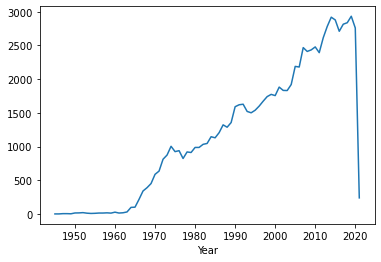

In [37]:
df_circ.Count.plot()

### and all of these cells remain live (unless you export to html). 
### So you can modify during presentations, if you are feeling bold

let us see how  many papers we need to review and possibly read each day

In [43]:
df_circ.assign(Per_day = df_circ.Count / 365)

,Count,Per_day
Year,,
2021,239,0.654795
2020,2759,7.558904
2019,2933,8.035616
2018,2837,7.772603
2017,2815,7.712329
...,...,...
1949,3,0.008219
1948,5,0.013699
1947,5,0.013699


## Publications are increasing in every field?

If we want to see context (overall publication rates) we can import this data and then join the two dataframes 

In [44]:
#Import a second dataframe from .csv file
df_all = pd.read_csv('./PubMed_Timeline_Results_by_Year_All.csv',skiprows=1, index_col=['Year'])
df_all.head()

,Count
Year,
2021,180100
2020,1616096
2019,1397826
2018,1338344
2017,1297783


## and then join the two dataframes 

In [45]:
df_combine = df_all.join(df_circ, on = 'Year', lsuffix='_all')
df_combine.head()

,Count_all,Count
Year,,
2021,180100,239
2020,1616096,2759
2019,1397826,2933
2018,1338344,2837
2017,1297783,2815


<AxesSubplot:xlabel='Year'>

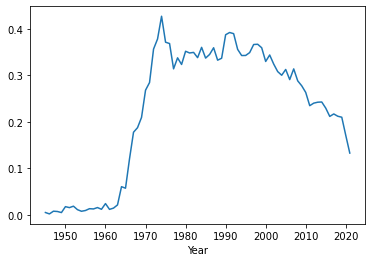

In [47]:

df_final = df_combine.assign(Percentage= (df_combine.Count / df_combine.Count_all)*100)
df_final.Percentage.plot()

## We can export our processed data in a range range of formats



In [48]:
df_final.to_excel('./final_publications_timeline.xlsx', sheet_name='circadian')

## We can use this library and Pandas to create and dataframe of testing data

***
Our fake DataFrame contains a name, country and coordinates (not related to each other), some random numbers, an e-mail address, timestamp, a paragraph of random text, and a 'bs'  (short for business, but then this is all 'bs')
***

In [65]:
# import out libraries, faker to make data and numpy (numerical python) for random numbers
import faker as fk
import numpy as np

In [67]:
# let's create a fake data generator for here   
fake_demo =fk.Faker('en_GB')

In [68]:
# and have a look at some of the options for generating data
fake_demo.first_name_female()

'Anna'

In [69]:
# country
fake_demo.country()

'Suriname'

In [61]:
# or geographical co-ordinates
fake_demo.latlng()

(Decimal('-1.587995'), Decimal('172.213919'))

In [70]:
 # and maybe a timestamp
fake_demo.iso8601()

'2017-09-06T11:56:40'

### We can also create a range of other data to test our analysis / model 

In [63]:
def create_fake_row(num=1):
    """Our fake DataFrame contains a name, country and coordinates (not related to each other),
    some random numbers, an e-mail address, timestamp, a paragraph of random text,
    and a 'bs'  (short for business, but then this is all 'bs')"""
    out = [{"name":fake_demo.name(),
            "LatLong":fake_demo.latlng(),
            "Country":fake_demo.country(),  # will not match LatLong
            "email":fake_demo.email(),
            "date_time":fake_demo.iso8601(),
            "paragraph":fake_demo.paragraph(),
            "bs":fake_demo.bs(),
            "randomdata":np.random.randint(1,1000)} for x in range(num)]
    return out

In [74]:
df_fake = pd.DataFrame(create_fake_row(1000))

df_fake.head()

,name,LatLong,Country,email,date_time,paragraph,bs,randomdata
0,Jacob Anderson,"(69.2082825, -40.765879)",Suriname,lydia57@freeman-price.com,2019-09-26T23:04:10,Mollitia ipsum exercitationem inventore. Illum...,iterate robust users,573
1,Ms. Margaret Brown,"(18.078639, 174.159915)",Ethiopia,marshallrussell@bell.com,1996-11-13T23:25:53,Ipsa molestiae fugit sed. Tenetur odio quibusd...,repurpose value-added technologies,959
2,Katherine Barnes,"(76.592469, -21.755137)",Mongolia,jayneshepherd@cook.com,2013-09-21T08:53:26,Nisi soluta modi consequuntur ex ratione assum...,envisioneer robust infrastructures,91
3,Dr. Carolyn Booth,"(-53.1161325, 118.172783)",Burundi,richardsfrank@gmail.com,1983-12-23T05:38:01,Commodi beatae accusantium sint ab laudantium ...,facilitate 24/365 niches,490
4,Diana Potter,"(16.485815, -117.071104)",Equatorial Guinea,claireedwards@smith.com,1996-09-30T05:46:06,Tempore doloremque quia numquam amet illum exp...,re-contextualize scalable initiatives,496


In [75]:
#Split LatLong column up
df_fake =df_fake.join(pd.DataFrame(df_fake.LatLong.values.tolist(), columns=['Lat', 'Long']))

we can split columns into new columns to help useage later if needed

In [76]:
fake_density =df_fake.Country.value_counts()

fake_density

Bahrain                                         11
El Salvador                                      9
Palau                                            9
Niger                                            9
South Georgia and the South Sandwich Islands     9
                                                ..
Slovenia                                         1
Nauru                                            1
French Guiana                                    1
Costa Rica                                       1
Saudi Arabia                                     1
Name: Country, Length: 240, dtype: int64


## Next we are going to import some of the choices we have for exploring geographical data

In [77]:
import geopandas as gpd
import matplotlib
%matplotlib inline

In [78]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [79]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [80]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [81]:
fake_demo_mapped = world.join(fake_density, on='name',how='inner')

fake_demo_mapped.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",5
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",8
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",4
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",2


<AxesSubplot:>

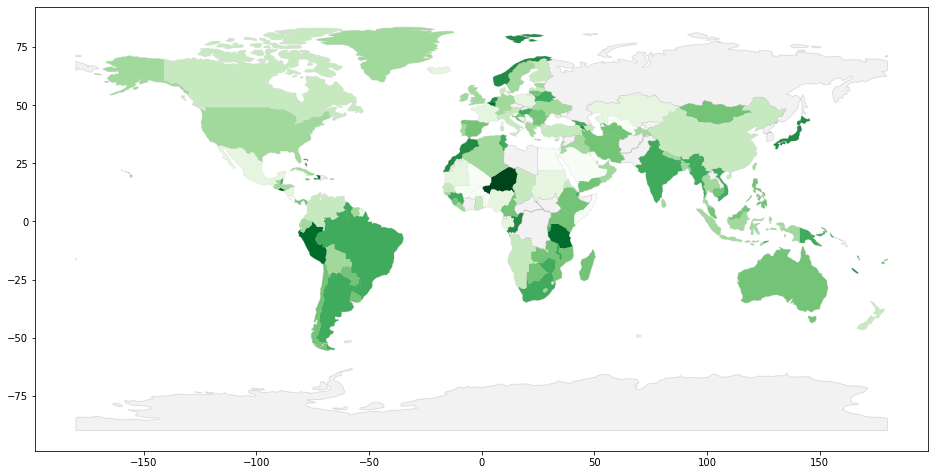

In [82]:
#  A matplotlib option 
base = world.plot(alpha=0.1, color='gray', edgecolor='black', figsize=(16,16))
fake_demo_mapped.plot(column = 'Country',cmap='Greens', legend=False, ax=base)

> ## It is probably true to say that whatever you area of interest or research, there will be a Jupyter Notebook out there to get you started.

These might be a good place to start...
### [Jupyter's Notebook Gallery](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)


### [An 'Awesome' list of projects and notebooks involving Jupyter](https://github.com/markusschanta/awesome-jupyter)